In [74]:
%pip install graphviz

مثال درخت تصمیم با مجموعه داده تایتانیک

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

خوندن مجموعه داده   -1

In [79]:
data=pd.read_csv("keshti.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


کارهای متناسب با تحلیل و پیش پردازش داده -2

In [80]:
data=data.loc[:,("Survived","Pclass","Gender","Age","SibSp","Parch","Fare")]
data.isnull().sum()

Survived      0
Pclass        0
Gender        0
Age         177
SibSp         0
Parch         0
Fare          0
dtype: int64

In [ ]:
# replacing missing values of age with median values
data.Age.fillna(data.Age.median(),inplace=True)
# replacing 0 values of fare with median values
data["Fare"]=data["Fare"].replace(0,data["Fare"].median())
#جایگزینی عدد 0 و 1 جای متن در ستون جنسیت
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
data.Gender = le.fit_transform(data.Gender)
data.head()

C:\Users\Masuod\AppData\Local\Temp\ipykernel_8020\1331150612.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data.Age.fillna(data.Age.median(),inplace=True)


,Survived,Pclass,Gender,Age,SibSp,Parch,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500


3- تقسیم کردن مجموعه داده 

In [82]:
x= data.iloc[:,1:]   #train
y= data.iloc[:,0]   #label
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=.3,random_state=12)
print(x_train.shape)
print(y_train.shape)

(623, 6)
(623,)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
model= DecisionTreeClassifier(criterion='gini',random_state=0)     
model.fit(x_train,y_train)                                        
predicted=model.predict(x_test)                                   
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,predicted)
print(f"Accuracy score with gini_index on test data is:{accuracy}")     

Accuracy score with gini_index on test data is:0.7611940298507462


با معیار انتروپی

In [84]:
model= DecisionTreeClassifier(criterion='entropy',random_state=0)
model.fit(x_train,y_train)                                      
predicted=model.predict(x_test)
accuracy=accuracy_score(y_test,predicted)
print(f"Accuracy score with entropy on test data is:{accuracy}") 

Accuracy score with entropy on test data is:0.7649253731343284


نمایش دادن درخت تصمیم

In [85]:
from sklearn import tree
print(tree.export_text(model))

|--- feature_1 <= 0.50
|   |--- feature_0 <= 2.50
|   |   |--- feature_2 <= 2.50
|   |   |   |--- feature_0 <= 1.50
|   |   |   |   |--- class: 0
|   |   |   |--- feature_0 >  1.50
|   |   |   |   |--- class: 1
|   |   |--- feature_2 >  2.50
|   |   |   |--- feature_2 <= 56.50
|   |   |   |   |--- feature_2 <= 27.00
|   |   |   |   |   |--- feature_2 <= 23.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_2 >  23.50
|   |   |   |   |   |   |--- feature_5 <= 115.20
|   |   |   |   |   |   |   |--- feature_5 <= 26.50
|   |   |   |   |   |   |   |   |--- feature_2 <= 25.50
|   |   |   |   |   |   |   |   |   |--- feature_5 <= 15.88
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |--- feature_5 >  15.88
|   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- feature_2 >  25.50
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- feature_5 >  26.50
|   |   |   |

[Text(0.44502617801047123, 0.98, 'x[1] <= 0.5\nentropy = 0.956\nsamples = 623\nvalue = [388.0, 235.0]'),
 Text(0.12958115183246074, 0.94, 'x[0] <= 2.5\nentropy = 0.804\nsamples = 216\nvalue = [53, 163]'),
 Text(0.287303664921466, 0.96, 'True  '),
 Text(0.04712041884816754, 0.9, 'x[2] <= 2.5\nentropy = 0.244\nsamples = 124\nvalue = [5, 119]'),
 Text(0.020942408376963352, 0.86, 'x[0] <= 1.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(0.010471204188481676, 0.82, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.031413612565445025, 0.82, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.07329842931937172, 0.86, 'x[2] <= 56.5\nentropy = 0.208\nsamples = 122\nvalue = [4, 118]'),
 Text(0.05235602094240838, 0.82, 'x[2] <= 27.0\nentropy = 0.169\nsamples = 120\nvalue = [3, 117]'),
 Text(0.041884816753926704, 0.78, 'x[2] <= 23.5\nentropy = 0.348\nsamples = 46\nvalue = [3, 43]'),
 Text(0.031413612565445025, 0.74, 'entropy = 0.0\nsamples = 34\nvalue = [0, 34]'),
 Text(0.052356020

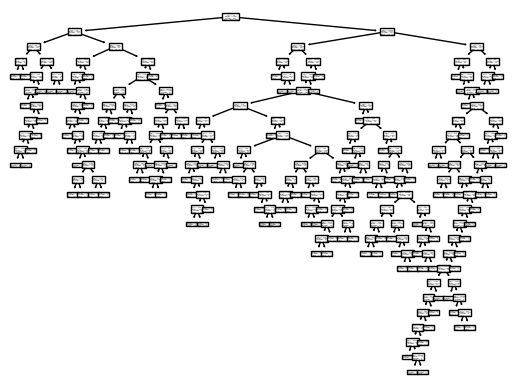

In [86]:
from sklearn import tree
tree.plot_tree(model)

if the tree.plot_tree() function in scikit-learn is generating a low-quality image for your decision tree model visualization,you can 
use the export_graphiz function from the sklearn.tree module to export the decision tree in Graphviz DOT format and then visualize it using external tools like Graphviz. (https://graphviz.gitlab.io/download/)

In [ ]:
from sklearn import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus
dot_data=StringIO()
export_graphviz(model,out_file=dot_data)
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png("./tree.png")
Image(graph.create_png())

درخت تصمیم خیلی عمیق شده و به نظر میاد بیش پردازش داشته باشه . پس عمق رو محدود میکنیم

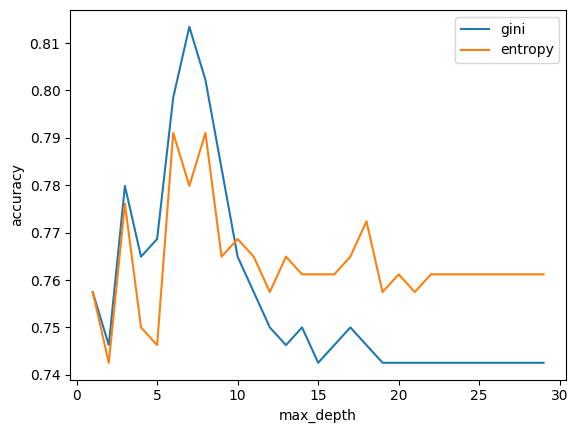

In [90]:
import matplotlib.pyplot as plt
max_depth=[]
acc_gini=[]
acc_entropy=[]
for i in range(1,30):
    dtree=DecisionTreeClassifier(criterion="gini",max_depth=i,random_state=12)  
    dtree.fit(x_train,y_train)
    pred=dtree.predict(x_test)
    acc_gini.append(accuracy_score(y_test,pred))
    
    
    
    dtree=DecisionTreeClassifier(criterion="entropy",max_depth=i,random_state=12)  
    dtree.fit(x_train,y_train)
    pred=dtree.predict(x_test)
    acc_entropy.append(accuracy_score(y_test,pred))
    max_depth.append(i)


d= pd.DataFrame({"acc_gini": pd.Series (acc_gini),
                 "acc_entropy": pd.Series (acc_entropy),
                 "max_depth": pd.Series (max_depth)})



plt.plot("max_depth","acc_gini",data=d, label="gini")
plt.plot("max_depth","acc_entropy",data=d, label="entropy")
plt.xlabel("max_depth")
plt.ylabel("accuracy")
plt.legend();

به نظر میرسه حالت جینی در عمق های کم نتیجه بهتری بهمون میده

In [99]:
max_depth_final=acc_gini.index(max(acc_gini))
print("best accuracy score is with gini_index at {%d} depth with {%f}:",max_depth_final," , ",max(acc_gini))

best accuracy score is with gini_index at {%d} depth with {%f}: 6  ,  0.8134328358208955


ما تونستیم مدل خودمون رو از دقت 0.76 به 0.81 تغییر بدیم. در حقیقت ما با تست حالات مختلف ،بهترین سناریو رو جهت ایجاد مدل انتخاب کردیم

In [101]:
from sklearn.metrics import confusion_matrix,precision_score
dtree=DecisionTreeClassifier(criterion="gini",max_depth=max_depth_final,random_state=123)
dtree.fit(x_train,y_train)
pred=dtree.predict(x_test)
accuracy_score(y_test,pred)
confusion_matrix=pd.DataFrame(confusion_matrix(y_test,pred))
confusion_matrix.index=["Actual Died","Actual Survived"]
confusion_matrix.columns=["predicted Died","predicted Survived"]
print(confusion_matrix)

                 predicted Died  predicted Survived
Actual Died                 147                  14
Actual Survived              45                  62


you can see 147+62=209 correct predictions & 45+14=59 false predictions

معیار دقت

In [ ]:
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html
from sklearn import precision_score
precision=precision_score(y_test,pred)
print(f"precision: {precision}")
#0.81....

In [103]:
from sklearn.metrics import recall_score
recall=recall_score(y_test,pred)
print(f"recall: {recall}")

recall: 0.5794392523364486
